In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
data2 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx', sheet_name=0, usecols="B:P")                      
                                 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

Y2_ = data2['Farm Milk Production per \nDay']
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder', 'Farm Milk Production per \nDay'], axis=1)

data2 = data2.join(encoded_data2)
data2 = data2.join(Y2_)

data2 = data2.to_numpy()
X2 = data2[:, :-1]
Y2 = data2[:, -1]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
data2 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx', sheet_name=0, usecols="B:P")                      

# Assuming the target variable is in a column named 'Farm Milk Production per \nDay'
X2 = data2.drop('Farm Milk Production per \nDay', axis=1)
y2 = data2['Farm Milk Production per \nDay']

# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = rf_model.predict(X2_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print(f'Mean Squared Error: {mse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


ValueError: could not convert string to float: 'Aug'

Mean Squared Error: 904.9887556938556
R-squared: 0.7383359977261759


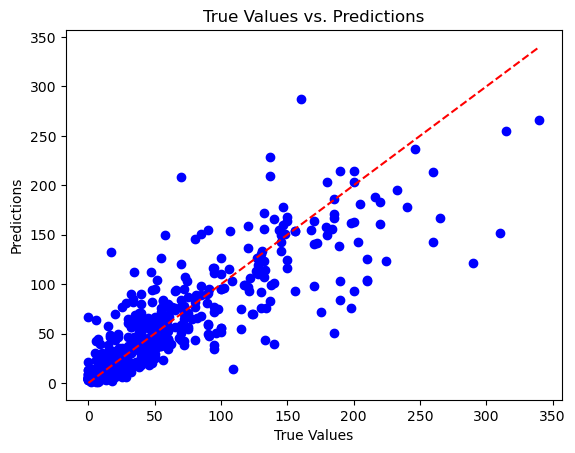

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# Assuming the target variable is in a column named 'Farm Milk Production per \nDay'
X2 = data2.drop('Farm Milk Production per \nDay', axis=1)
y2 = data2['Farm Milk Production per \nDay']

# Apply OneHotEncoder
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(X2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Drop the original categorical columns
X2 = X2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)

# Join the encoded data
X2 = pd.concat([X2, encoded_data2], axis=1)

# Convert to NumPy array
X2 = X2.to_numpy()

# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=0)

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X2_train = imputer.fit_transform(X2_train)
X2_test = imputer.transform(X2_test)

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = rf_model.predict(X2_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)
print(f'Mean Squared Error: {mse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Root Mean Squared Error: 24.05274226732227
R-squared: 0.7904813736740148


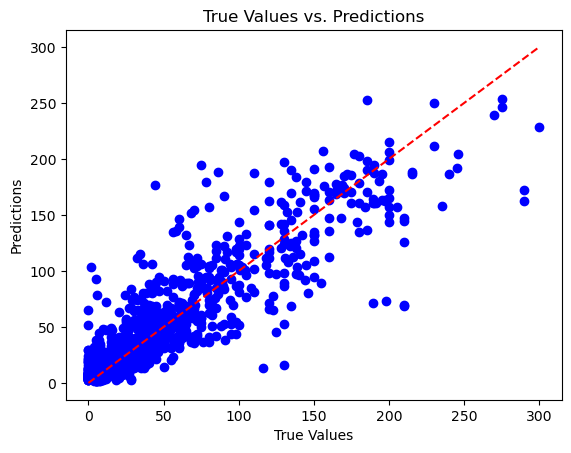

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
data2 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx', sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


Root Mean Squared Error: 22.559385018557872
R-squared: 0.8156904005185965


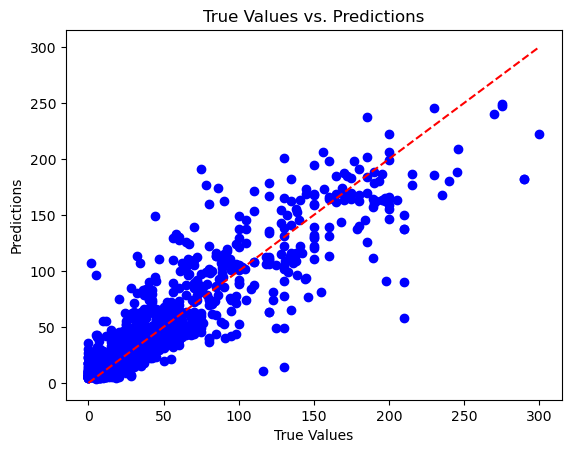

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
data2 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx', sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)


# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest Regression model with hyperparameter tuning
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)
# Convert all column names to strings
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [7, 9, 10],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the RandomForestRegressor with the best parameters
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Root Mean Squared Error: 15.431148690175801
Random Forest - R-squared: 0.9045578898588307


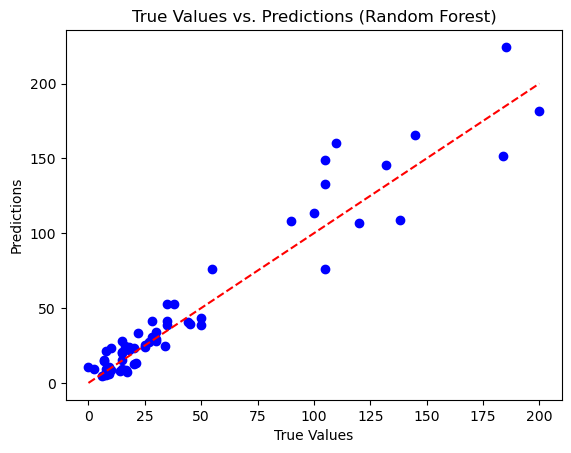

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2,],
    'min_samples_leaf': [1, ]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the RandomForestRegressor with the best parameters
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error and R-squared
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Root Mean Squared Error: {rmse_rf}')
print('Random Forest - R-squared:', r2_rf)

# Visualize the results (optional)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Random Forest)')
plt.show()


Root Mean Squared Error: 22.38060572439508
R-squared: 0.8186000698705482


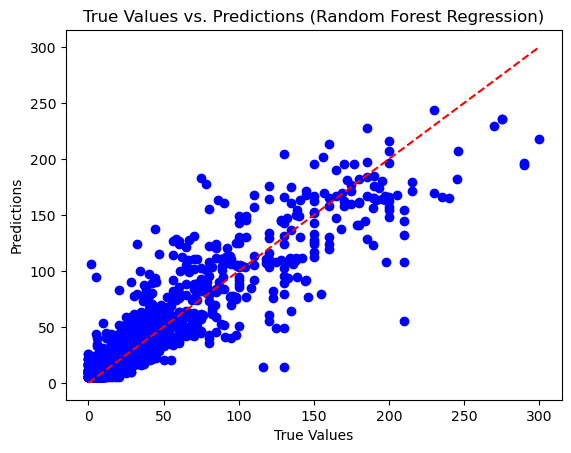

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

# Convert all column names to strings
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.2, random_state=42)


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Random Forest Regression)')
plt.show()


C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Feature Importance:
farm size : 0.8161552496790085
Green Fodder given 
to in milk: 0.028648792031349478
21: 0.016884057770589968
20: 0.015944280743059983
18: 0.014283457290968454
Rainfall: 0.013448907407093522
Dry Fodder given to
 in milk: 0.011511254473099029
13: 0.009083991467444269
RH: 0.009066816210504505
15: 0.007723630148141176
Max T: 0.0063811210050979845
THI: 0.005816955277425667
Min T: 0.00558239390929567
Mean T: 0.0054885069591546695
14: 0.004624940773425422
25: 0.004155053469063051
32: 0.0032106060925419233
17: 0.003029209088959232
31: 0.002908336947517568
33: 0.0026154907176636345
27: 0.0025531257195245943
22: 0.0022442173994777184
29: 0.0021122638430557325
7: 0.001621064885201782
3: 0.0010057456982074566
11: 0.0008461623322964701
0: 0.0005905468647918495
2: 0.0003988037269749756
12: 0.0003977488222784889
10: 0.0003725411063942382
6: 0.0003482283181388881
4: 0.00024043

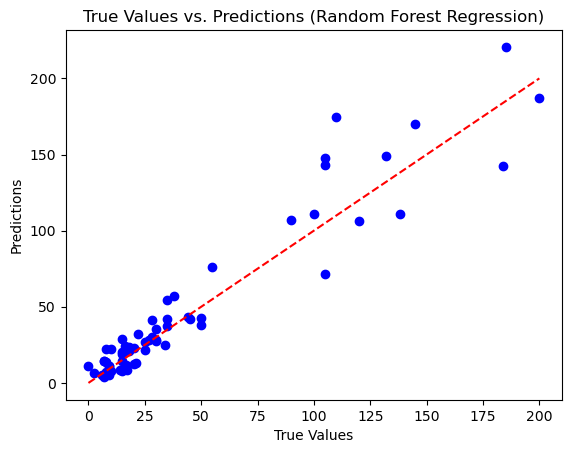

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)

# Convert all column names to strings
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Feature Importance Analysis
feature_importances = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Print the feature importance scores
print("Feature Importance:")
for i in range(X_train_scaled.shape[1]):
    print(f"{X_train.columns[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]}")

# Select the top features and retrain the model
top_features = X_train.columns[sorted_idx[:10]]  # Adjust the number of top features as needed
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain the model with the selected top features
best_rf_model.fit(X_train_top, y_train)

# Make predictions on the test set with the updated model
y_pred = best_rf_model.predict(X_test_top)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Random Forest Regression)')
plt.show()


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Root Mean Squared Error: 15.431148690175801
Random Forest - R-squared: 0.9045578898588307


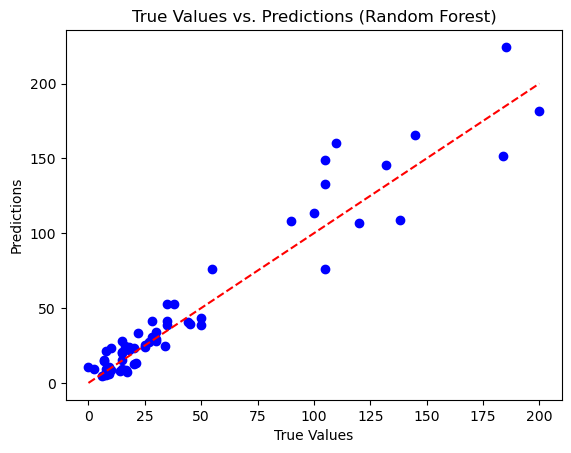

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(data2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
data2 = data2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
data2 = data2.join(encoded_data2)
data2.columns = data2.columns.astype(str)

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2,],
    'min_samples_leaf': [1, ]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the RandomForestRegressor with the best parameters
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error and R-squared
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Root Mean Squared Error: {rmse_rf}')
print('Random Forest - R-squared:', r2_rf)

# Visualize the results (optional)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Random Forest)')
plt.show()


R^2 score (Random Forest Regression): 0.09018156647321462
Mean Squared Error (Random Forest Regression): 20.585355047282338
Root Mean Squared Error (Random Forest Regression): 4.537108666020942


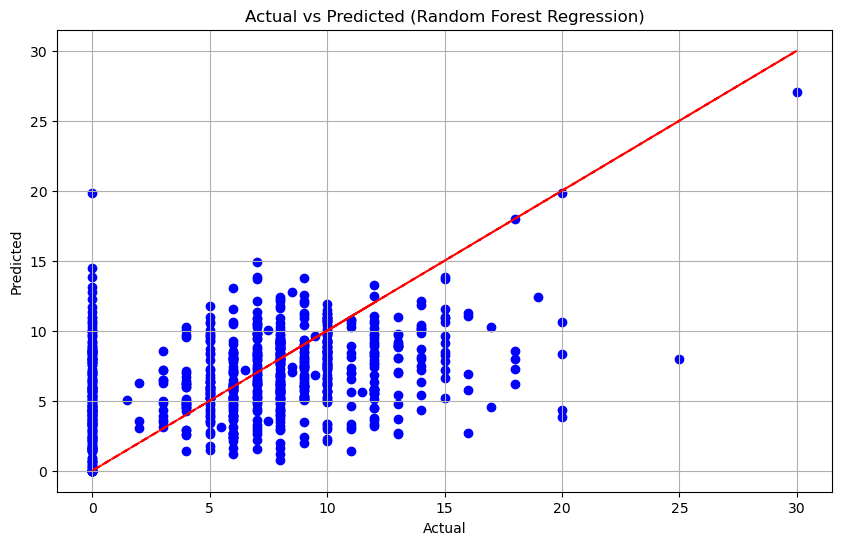

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data1 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")

# One-hot encoding for categorical variable
encoder = OneHotEncoder()
encoded_data1 = pd.DataFrame(encoder.fit_transform(data1[['Breed']]).toarray())

# Separate target variable
Y1_ = data1['Milk Production/Day']
data1 = data1.drop(['Breed','Milk Production/Day'], axis=1)

# Combine encoded data and target variable
data1 = data1.join(encoded_data1)
data1 = data1.join(Y1_)

# Convert to numpy arrays
data1 = data1.to_numpy()
X1 = data1[:,0:-1]
Y1 = data1[:,-1]

# Split data into train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X1_train, Y1_train)
y_pred_rf = rf_regressor.predict(X1_test)

# Model evaluation
r_squared_rf = r2_score(Y1_test, y_pred_rf)
mse_rf = mean_squared_error(Y1_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("R^2 score (Random Forest Regression):", r_squared_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)
print("Root Mean Squared Error (Random Forest Regression):", rmse_rf)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(Y1_test, y_pred_rf, color='blue')
plt.plot(Y1_test, Y1_test, color='red', linestyle='--')
plt.title('Actual vs Predicted (Random Forest Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()
